## Gathering Data

In [1]:
# importing libraries
import time
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Downloading image_predictions.tsv programmatically
   
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)

# with open(url.split('/')[-1], mode = 'wb') as file:
#     file.write(response.content)

In [3]:
# Setting up twitter API object 
consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)


In [4]:
# # Check that the API is working

# # Reading twitter-archive-enhanced.csv as pandas dataframe
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv') 
# id = twitter_archive_enhanced.tweet_id[0]
# tweet = api.get_status(id, tweet_mode='extended')
# print(tweet.full_text)

In [5]:
# #Extract text from API and write JSON file tweet_json.txt
# error_log = {}
# start = time.time()
# with open('tweet_json.txt', 'w') as outfile:          
#     for id in twitter_archive_enhanced.tweet_id:
#         try:
#             tweet = api.get_status(id, tweet_mode='extended')._json
#             json.dump(tweet, outfile)
#             outfile.write('\n')

#         except tweepy.TweepError as e:
#             error_log[id]=e
#             pass

# end = time.time()
# print('Process complete. Time taken: {}'.format(end-start))

In [6]:
# with open('error_log.txt', 'w') as file:
#     for error in error_log:
#         file.write('%s\n' %error)

In [7]:
# Convert the json data into a dataframe tweet_json
tweet_json = pd.DataFrame(columns =['tweet_id', 'retweet_count', 'favorite_count', 'created_at'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        created_at = status['created_at']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count, created_at]], columns =['tweet_id', 'retweet_count', 'favorite_count', 'created_at']))
                                   
tweet_json = tweet_json.reset_index(drop=True)


## Accessing Data

In [8]:
# DataFrame from tweeter API
tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count,created_at
2121,669923323644657664,53,222,Thu Nov 26 16:59:01 +0000 2015
704,783085703974514689,2190,8134,Mon Oct 03 23:25:55 +0000 2016
682,786233965241827333,4711,15200,Wed Oct 12 15:55:59 +0000 2016
1115,728015554473250816,1076,4015,Thu May 05 00:16:48 +0000 2016
11,889880896479866881,4442,25729,Tue Jul 25 16:11:53 +0000 2017
904,754856583969079297,2468,6807,Mon Jul 18 01:53:28 +0000 2016
1977,672481316919734272,122,683,Thu Dec 03 18:23:34 +0000 2015
901,755206590534418437,5264,16188,Tue Jul 19 01:04:16 +0000 2016
1612,684200372118904832,1011,2106,Tue Jan 05 02:30:55 +0000 2016
1343,702598099714314240,3350,11941,Wed Feb 24 20:56:55 +0000 2016


In [9]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
 3   created_at      2331 non-null   object
dtypes: object(4)
memory usage: 73.0+ KB


In [10]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count,created_at
count,2331,2331,2331,2331
unique,2331,1694,1977,2331
top,701981390485725185,219,0,Mon Oct 03 23:25:55 +0000 2016
freq,1,5,163,1


In [11]:
# WeRateDogs tweeter archive
twitter_archive_enhanced.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hurley. He's the curly one...,6.794628e+17,4.196984e+09,2015-12-23 00:45:35 +0000,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2078,670832455012716544,NaN,NaN,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amy. She is Queen Starburst. 10/10 une...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670832455...,10,10,Amy,None,None,None,None
468,817056546584727552,NaN,NaN,2017-01-05 17:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chloe. She fell asleep at the wheel. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817056546...,11,10,Chloe,None,None,None,None
122,869227993411051520,NaN,NaN,2017-05-29 16:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1236,712438159032893441,NaN,NaN,2016-03-23 00:37:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kane. He's a semi-submerged Haitian Hu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712438159...,11,10,Kane,None,None,None,None


In [12]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# Image prediction data frame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
249,670679630144274432,https://pbs.twimg.com/media/CU67jGSUkAAk_1Y.jpg,1,Ibizan_hound,0.342734,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True
1815,833826103416520705,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1,Chihuahua,0.438054,True,kelpie,0.149706,True,Pembroke,0.096480,True
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.958452,True,Cardigan,0.023770,True,Chihuahua,0.005269,True
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False
864,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,1,toy_poodle,0.880014,True,miniature_poodle,0.100136,True,Norfolk_terrier,0.007027,True
1444,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,long-horned_beetle,0.613852,False,ox,0.029473,False,rhinoceros_beetle,0.027806,False
1556,793210959003287553,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1,doormat,0.874431,False,French_bulldog,0.018759,True,Boston_bull,0.015134,True
2006,877611172832227328,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True


In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality
##### 1. Wrong data type
- `tweet_json` *retweet_count* and *favorite_count* are strings, but should be integers
- `tweet_json` *tweet_id* should be strings, not integers
- `tweet_json` *created_at* datatype is string, but should be date
- `twitter_archive_enhanced` *tweet_id*, *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id* should be strings, not integers or floats
- `twitter_archive_enhanced` *retweeted_status_timestamp* should be date, not strings
- `twitter_archive_enhanced` *rating_numerator* and *rating_denominator* should be floats, not integers

##### 2. Too few non-null values in some columns
- `twitter_archive_enhanced` Some columns have very few non-null values, such as *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*.  These columns are insignificant and should be dropped in data cleaning process below

##### 3. Wrong dog name
- `twitter_archive_enhanced` Some dog's *name* is wrong.  *name* for tweet_id 730924654643314689 is 'unacceptable', *name* for tweet_id 671561002136281088 is 'the', name for tweet_id 700864154249383937 is 'a'

##### 4. Multiple dog stage names in same row
- `twitter_archive_enhanced` Some rows have multiple dog stage names (for example, some dog is both doggo and floofer)
- `image_predictions` *p1*, *p2*, *p3*: some names start with upper case letter, but some don't.

##### 5. Zero values rating_denominator  in `twitter_archive_enhanced`

##### 6. Some rows are retweets and should be dropped
- These rows have non-null values in the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

##### 7. Some columns have values "None" in stead of "NaN"
##### 8. Some rating_denominator are not 10

### Tidiness
- `twitter_archive_enhanced` *doggo*, *flooffer*, *pupper*, and *puppo* are values, not column names.  They should be put into one column named *dog_stage* 
- Since every observation unit should form one table, the three tables should be merged into one master table

## Cleaning Data

In [17]:
# make copies of the tree dataframes
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()
tweet_json_copy = tweet_json.copy()
image_predictions_copy = image_predictions.copy()

#### Define
- Remove retweets in twitter_archive_enhanced_copy: drop rows where columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have non_null values. 
- Remove rows where rating_denominator is zero.

#### Code

In [18]:
# Filter the data frame using conditions "retweeted_status_id.isnull()"
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[twitter_archive_enhanced_copy.retweeted_status_id.isnull()]
# Filter the data frame using conditions rating_denominator != 0
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy.query('rating_denominator!=0')

# Drop the three empty columns etweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
twitter_archive_enhanced_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

#### Test

In [19]:
twitter_archive_enhanced_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator
count,2.174000e+03,7.700000e+01,7.700000e+01,2174.000000,2174.000000
mean,7.370753e+17,7.443425e+17,2.040329e+16,12.779669,10.497700
std,6.746937e+16,7.561569e+16,1.260797e+17,43.198178,7.017088
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,2.000000
25%,6.768326e+17,6.757073e+17,3.589728e+08,10.000000,10.000000
50%,7.097095e+17,7.032559e+17,4.196984e+09,11.000000,10.000000
75%,7.893029e+17,8.233264e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,1776.000000,170.000000


##### Define
Merge the three dataframes into one master dataframe and drop columns with too many null values

##### Code

In [20]:
# Convert tweet_id to int64 in preparation for merge
twitter_archive_enhanced_copy.tweet_id = twitter_archive_enhanced_copy.tweet_id.astype(str)
twitter_archive_enhanced_copy.tweet_id = pd.to_numeric(twitter_archive_enhanced_copy.tweet_id, errors='coerce')

tweet_json_copy.tweet_id = tweet_json_copy.tweet_id.astype(str)
tweet_json_copy.tweet_id = pd.to_numeric(tweet_json_copy.tweet_id, errors='coerce')

# Merge twitter_archive_enhanced_copy with tweet_json_copy,
mer1 = pd.merge(left=twitter_archive_enhanced_copy, right=tweet_json_copy, how='inner', left_on='tweet_id',\
                right_on='tweet_id')

# Convert tweet_id to int64 in preparation for merge
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype(str)
image_predictions_copy.tweet_id = pd.to_numeric(image_predictions_copy.tweet_id, errors='coerce')

# Merge mer1 with image_predictions_copy
twitter_archive_master = pd.merge(left=mer1, right=image_predictions_copy, how='inner', left_on='tweet_id',\
                                  right_on='tweet_id')

# Drop five columns with too many null values
twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

##### Test

In [21]:
# twitter_archive_master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   timestamp           1987 non-null   object 
 2   source              1987 non-null   object 
 3   text                1987 non-null   object 
 4   expanded_urls       1987 non-null   object 
 5   rating_numerator    1987 non-null   int64  
 6   rating_denominator  1987 non-null   int64  
 7   name                1987 non-null   object 
 8   doggo               1987 non-null   object 
 9   floofer             1987 non-null   object 
 10  pupper              1987 non-null   object 
 11  puppo               1987 non-null   object 
 12  retweet_count       1987 non-null   object 
 13  favorite_count      1987 non-null   object 
 14  created_at          1987 non-null   object 
 15  jpg_url             1987 non-null   object 
 16  img_nu

##### Define
Correct erroneous data types using astype() function

##### Code

In [22]:
# Convert retweet_count and favorite_count to float
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype(float)
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype(float)

# Convert created_at and timestamp to datetime
twitter_archive_master.created_at =  pd.to_datetime(twitter_archive_master.created_at)
twitter_archive_master.timestamp =  pd.to_datetime(twitter_archive_master.timestamp)

# Convert tweet_id to strings
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)

# Convert rating numerator and denominator to floats
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.astype(float)
twitter_archive_master.rating_denominator = twitter_archive_master.rating_denominator.astype(float)

##### Test

In [23]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   float64            
 6   rating_denominator  1987 non-null   float64            
 7   name                1987 non-null   object             
 8   doggo               1987 non-null   object             
 9   floofer             1987 non-null   object             
 10  pupper              1987 non-null   object             
 11  puppo               1987 non-null   object             
 12  retweet_count       1987 non-null 

#### Define
- Deal with "None" in doggo, floofer, pupper, and puppo columns
- Combine these four columns into a new column named dog_stage
- Drop the original four columns

#### Code

In [24]:
# Replace "None" with ''
twitter_archive_master.doggo.replace('None','',inplace=True)
twitter_archive_master.floofer.replace('None','',inplace=True)
twitter_archive_master.pupper.replace('None','',inplace=True)
twitter_archive_master.puppo.replace('None','',inplace=True)

In [25]:
# merge into column
twitter_archive_master['dog_stage'] = twitter_archive_master.doggo + twitter_archive_master.floofer + twitter_archive_master.pupper + twitter_archive_master.puppo

# handle multiple stages
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_master.loc[twitter_archive_master.dog_stage == '', 'dog_stage'] = np.nan

# drop doggo, floofer, pupper, and puppo columns
twitter_archive_master.drop(['doggo','puppo','floofer','pupper'],axis=1, inplace=True)

##### Test

In [26]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   float64            
 6   rating_denominator  1987 non-null   float64            
 7   name                1987 non-null   object             
 8   retweet_count       1987 non-null   float64            
 9   favorite_count      1987 non-null   float64            
 10  created_at          1987 non-null   datetime64[ns, UTC]
 11  jpg_url             1987 non-null   object             
 12  img_num             1987 non-null 

#### Define
Correct name, replace "None" with "nan"

#### Code

In [27]:
twitter_archive_master.name.replace("None", np.nan, inplace=True)
twitter_archive_master.name.replace("a", np.nan, inplace=True)
twitter_archive_master.name.replace("an", np.nan, inplace=True)
twitter_archive_master.name.replace("the", np.nan, inplace=True)


#### Test

In [28]:
twitter_archive_master.query('name=="a" or name == "an" or name == "the"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


##### Save cleaned twitter_archive_master as a csv file

In [29]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False);

## Data Analysis and Visualization

In [30]:
# Read in the master file as df dataframe
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   timestamp           1987 non-null   object 
 2   source              1987 non-null   object 
 3   text                1987 non-null   object 
 4   expanded_urls       1987 non-null   object 
 5   rating_numerator    1987 non-null   float64
 6   rating_denominator  1987 non-null   float64
 7   name                1373 non-null   object 
 8   retweet_count       1987 non-null   float64
 9   favorite_count      1987 non-null   float64
 10  created_at          1987 non-null   object 
 11  jpg_url             1987 non-null   object 
 12  img_num             1987 non-null   int64  
 13  p1                  1987 non-null   object 
 14  p1_conf             1987 non-null   float64
 15  p1_dog              1987 non-null   bool   
 16  p2    

In [31]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.356264e+17,12.280825,10.533971,2397.808254,8115.978359,1.203322,0.593317,1.344725e-01,6.037114e-02
std,6.739210e+16,41.570741,7.333532,4289.641778,11950.253968,0.561369,0.271959,1.005706e-01,5.091543e-02
min,6.660209e+17,0.000000,2.000000,11.000000,70.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758218e+17,10.000000,10.000000,537.500000,1740.000000,1.000000,0.361531,5.409535e-02,1.624950e-02
50%,7.083495e+17,11.000000,10.000000,1161.000000,3673.000000,1.000000,0.587342,1.175080e-01,4.953060e-02
75%,7.873602e+17,12.000000,10.000000,2731.500000,10086.500000,1.000000,0.844583,1.950575e-01,9.180755e-02
max,8.924206e+17,1776.000000,170.000000,75844.000000,153044.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Insight 1: what breed of dog has the highest prediction confidence?

In [32]:
# Filter the dataframe so that p1 prediction results are real dog breeds and have a confidenc higher than 0.96
df.query('p1_dog==True and p1_conf > 0.96').p1.value_counts()

pug                            18
Pembroke                       15
Samoyed                        15
golden_retriever               14
Pomeranian                     12
chow                            7
French_bulldog                  7
Labrador_retriever              6
Chihuahua                       5
Shetland_sheepdog               4
German_shepherd                 4
Bernese_mountain_dog            3
beagle                          2
keeshond                        2
komondor                        2
Shih-Tzu                        2
basset                          2
Blenheim_spaniel                2
malamute                        2
Rottweiler                      2
Old_English_sheepdog            2
English_springer                2
Pekinese                        2
cocker_spaniel                  2
Boston_bull                     2
dalmatian                       2
Saint_Bernard                   2
bull_mastiff                    2
vizsla                          2
boxer         

According to the results above, over ten Pug, Golden_retriever, Samoyed, Pembroke, Pomeranian have prediction confidence higher than 0.96.  These breeds are easiler to predict for the algorithm.

#### Insight 2: What stage of dogs gets the highest retweet count and favorite count?

In [33]:
df[~df.dog_stage.isnull()].sort_values(by=['favorite_count','retweet_count'], ascending=False)\
    [['dog_stage','favorite_count', 'retweet_count']].head(20)

,dog_stage,favorite_count,retweet_count
769,doggo,153044.0,75844.0
305,puppo,130548.0,42720.0
107,pupper,114346.0,32225.0
804,doggo,113178.0,56434.0
329,doggo,86532.0,36632.0
293,puppo,56392.0,17352.0
446,doggo,49612.0,23569.0
835,"doggo, pupper",48957.0,16372.0
49,pupper,45588.0,14255.0
328,doggo,45067.0,18862.0


(array([1.672e+03, 2.330e+02, 5.500e+01, 1.000e+01, 7.000e+00, 4.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([7.000000e+01, 1.536740e+04, 3.066480e+04, 4.596220e+04,
        6.125960e+04, 7.655700e+04, 9.185440e+04, 1.071518e+05,
        1.224492e+05, 1.377466e+05, 1.530440e+05]),
 <a list of 10 Patch objects>)

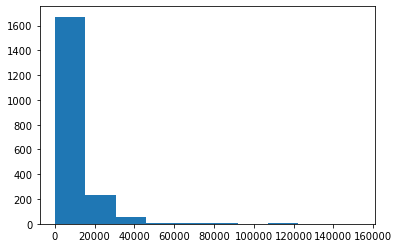

In [34]:
# Distribution of favorite_count
plt.hist(df.favorite_count)

The histogram above shows most dogs got a favorite_count less than 20000, but a few got very high favorite_count close to 160,000.  The printed table in [98] shows that for the 20 most popular dogs, there is only one floofer, while doggo, puppo, and pupper all get very high favorite_count.

#### Insight 3: what is the relationship between favorite count and the rating? Do dogs with a high rating also get a high favoite count?

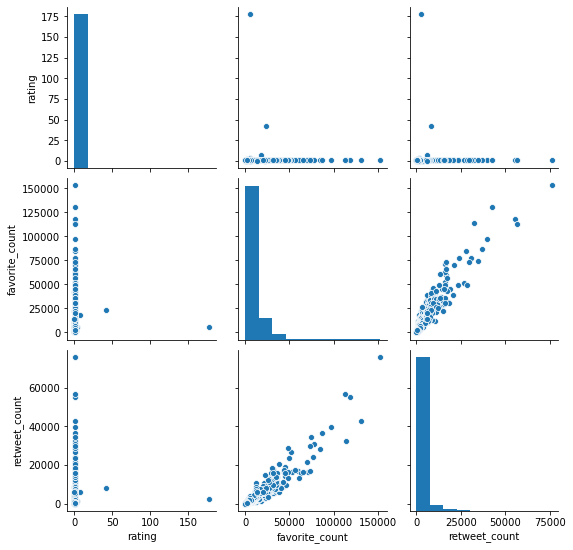

In [35]:
df['rating'] = df.rating_numerator/df.rating_denominator
df2 = df[['rating','favorite_count','retweet_count']]

g = sns.pairplot(df2)
plt.show()

The plot above shows the relationshop between retweet_count, favorite_count, and rating.  We can see that retweet_count and favorite_count have a strong positive correlation, but neither of favorite_count and retweet_count has an effect on the rating.  This is a surprise, because dogs with higher retweet_count should get higher rating.  The way these dogs got ratings is probably different than expected.